# Visualisierung mit Python - interaktive Beispiele
von Patrick Senti

### Themen

* pandas
* seaborn
* plotly

Interaktive Ausführung mit plots-interaktiv.ipynb

Quelle: https://gist.github.com/miraculixx/6d9994d060e7a200f120f91b8b459c41

In [484]:
# libraries importieren
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import warnings
warnings.filterwarnings('ignore') # Warnungen ignorieren, das nicht relevant. Um die Warnungen trotzdem zu sehen, "ignore" mit "always" ersetzen
sns.set_theme() # wir verwenden das Seaborn-Theme für alle matplotlib Plots (mit matplotlib, pandas, seaborn)
plt.rc('figure', figsize=(8, 4)) # default fig size matplotlib, pandas, seaborn (w, h) in inches
pio.renderers.default = 'jupyterlab' # enable for pdf export/printing

# pandas

* pandas ist eine Python Library für Datenverarbeitung, -Analyse und -Manipulation

### Referenzen 

* https://pandas.pydata.org 
* https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf 
* https://github.com/tommyod/awesome-pandas 

In [485]:
from io import StringIO
daten = """
land,umsatz
Schweiz,1000
Deutschland,9000
USA,15000
"""
in_memory_file = StringIO(daten)
df_umsatz = pd.read_csv(in_memory_file)
df_umsatz

,land,umsatz
0,Schweiz,1000
1,Deutschland,9000
2,USA,15000


In [486]:
df_meteo = pd.read_csv('./data/wetter_monthly.csv')
df_meteo

,month,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,01-Jan,1.683871,-0.819355,4.658065,1.274194,4.838710,169.419355,7.767742,28.448387,1028.535484,NaN
1,02-Feb,4.471429,1.157143,8.457143,1.942857,0.357143,201.857143,12.667857,46.103571,1023.535714,NaN
2,03-Mar,7.229032,2.200000,13.067742,0.854839,0.000000,83.066667,6.856667,26.976667,1022.570000,NaN
3,04-Apr,9.153333,4.593333,14.276667,2.840000,1.666667,149.466667,9.766667,33.593333,1014.043333,NaN
4,05-May,15.961290,11.461290,21.151613,2.341935,0.000000,139.354839,6.616129,26.583871,1018.019355,NaN
5,06-Jun,19.506667,14.256667,25.270000,4.220000,0.000000,158.233333,6.460000,24.800000,1015.963333,NaN
6,07-Jul,21.193548,15.641935,27.406452,1.445161,0.000000,139.838710,6.770968,24.558065,1019.167742,NaN
7,08-Aug,20.322581,15.322581,26.500000,2.422581,0.000000,106.387097,6.461290,23.838710,1015.609677,NaN
8,09-Sep,14.236667,10.723333,18.586667,3.760000,0.000000,173.366667,7.370000,26.293333,1014.763333,NaN
9,10-Oct,13.712903,10.567742,17.916129,2.238710,0.000000,145.870968,5.287097,21.629032,1021.490323,NaN


# Daten plotten, visuell darstellen

* Einen ersten einfachen Bar-Plot mit `df.plot.bar()` erstellen
* Den Bar-Plot gibt's auch in horizontaler Darstellung mit `df.plot.barh()`

<Axes: xlabel='land'>

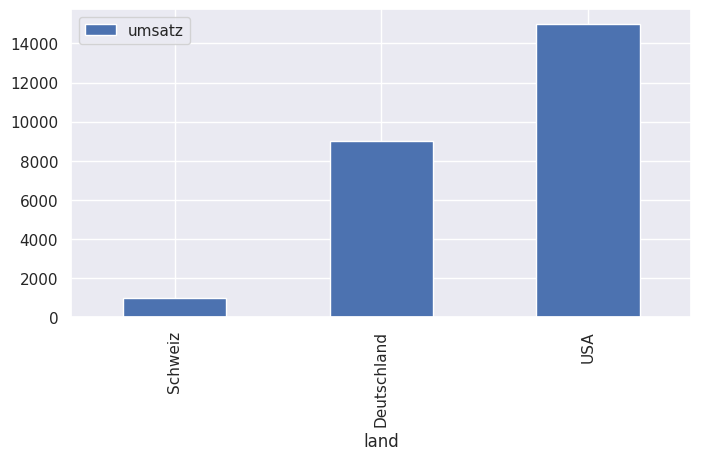

In [146]:
df_umsatz.plot.bar(x='land', 
                   y='umsatz')

<Axes: ylabel='land'>

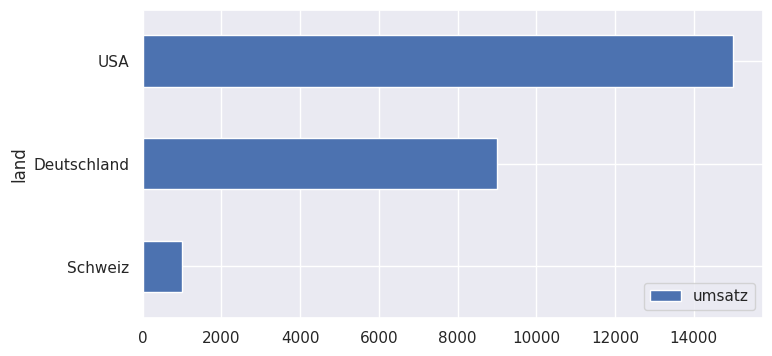

In [147]:
# achtung, x= und y= behalten ihre semantische Bedeutung von plot.bar()
# -- d.h. x= ist die Gruppierung, y= die Metrik
# -- dies obwohl die x und y Achse in der Darstellung vertauscht sind 
# -- das macht es einfacher von .bar() auf .barh() zu wechseln
df_umsatz.plot.barh(x='land', 
                    y='umsatz')

* Scatter Plots vergleichen viele Datenpunkte in zwei Dimensionen: `df.plot.scatter()`

<Axes: xlabel='tavg', ylabel='snow'>

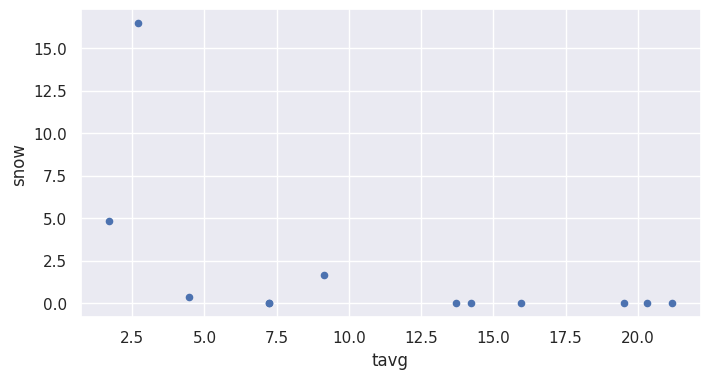

In [148]:
df_meteo.plot.scatter(x='tavg', 
                      y='snow')

* Lineplots zeigen Entwicklungen über Zeit (oder andere ordinale Einteilungen)

<Axes: xlabel='month'>

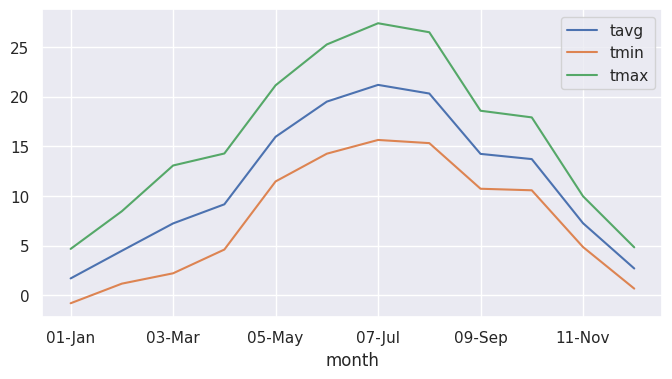

In [149]:
df_meteo.plot.line(x='month', 
                   y=['tavg', 'tmin', 'tmax']) # NB. mehrere Columns aus dem Dataframe, jede Column ist eine Metrik (= Wide Format)

* Nächster Plot: Pie-Charts mit `df.plot.pie()`
* Ein Pie-Plot entspricht einer Aggregation einer Gruppe zu insgesamt 100%
* Wir müssen die Daten selbst gruppieren: mit `df.groupby()`

<Axes: ylabel='umsatz'>

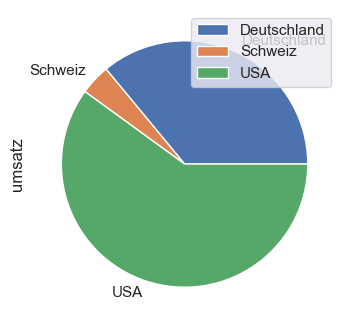

In [487]:
(df_umsatz
 .groupby('land')
 .sum('umsatz')
 .plot.pie(y='umsatz'))

Der Pie Plot ist kaum lesenbar: 

* die Prozent-Anteile sind nicht sichtbar => `.pie(..., autopct='%1.1f%%')`
* die Legende ist über dem Pie-Plot => `plt.legend()`
* die Beschriftung der Y Achse wirkt verwirrend => `plt.ylabel()`
* die Farbe und Fontgrösse ist nicht schön zu lesen => `.pie(..., fontsize=, textprops=)`
* weitere Parameter und Beispiele: https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_and_donut_labels.html

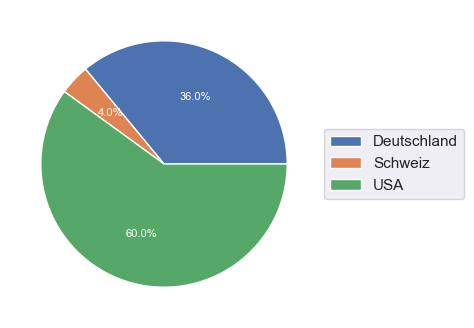

In [488]:
(df_umsatz
 .groupby('land')
 .sum('umsatz')
 .plot.pie(y='umsatz',
           autopct='%1.1f%%', 
           fontsize=8,
           textprops={'color': 'white'},
          ))
plt.ylabel('')
plt.legend(loc='center right', # lower left/center/right
           bbox_to_anchor=(1.5, .5)) # (0,0) = unten links, (1,1) = oben rechts, versuche je verschiedene Werte im Bereich (-2,...,+2)
plt.show()

# Beschriftung, Achsenskalierung

* Titel => `plt.title()` und `plt.suptitle()`
* Legende => `plt.legend()`
* X-Achse => `plt.xlabel()`
* Y-Achse => `plt.ylabel()`
* X-Achse Ticks => `plt.xticks()`
* Marker => `plot.line(..., marker=)`

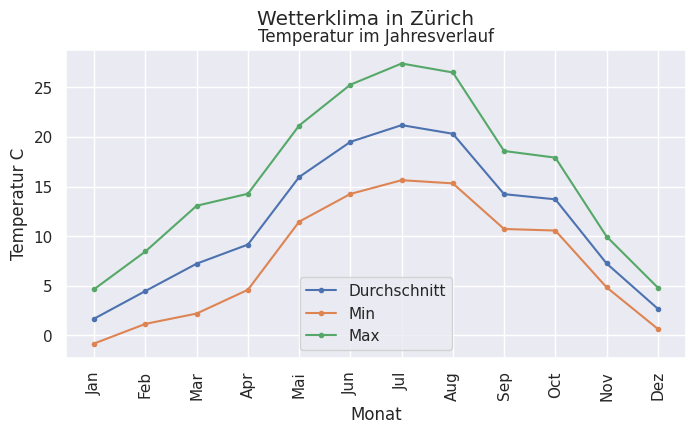

In [152]:
(df_meteo
 .plot.line(x='month', 
            y=['tavg', 'tmin', 'tmax'],
            marker='.')
)
plt.suptitle('Wetterklima in Zürich')
plt.title('Temperatur im Jahresverlauf')
plt.xticks(ticks=range(0, 12),
           labels=['Jan', 'Feb', 'Mar', 'Apr', 'Mai', 'Jun', 
                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dez'],
          rotation=90)
plt.xlabel('Monat')
plt.ylabel('Temperatur C')
plt.legend(['Durchschnitt', 'Min', 'Max'], 
           loc='lower center') 
plt.show()

# Subplots

* Manchmal möchten wir mehrere Plots zugleich erstellen => `plt.subplots()`
* Der gesamte Plot-Bereich nennt sich *Figure*, jeder einzelne Plot ist eine *Axis*, alle Plots zusammen heissen *Axes* (Mehrzahl)
* Die Plots werden mittels Angabe der jeweiligen Axis gezeichnet => `df.plot.line(..., ax=); df.plot.scatter(..., ax=)`
* Einige der `plt.*` Funktionen müssen explizit auf dem jeweiligen Plot bzw. Axis ausgeführt werden, und haben einen anderen Namen => z.B. `plt.title()` => `ax.set_title()`, `plt.xticks()` => `ax.set_xticks()` usw.

### Weitere Informationen

* Detailliertes Tutorial dazu: https://realpython.com/python-matplotlib-guide/
* Referenz Figure: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html
* Referenz Axis: https://matplotlib.org/stable/api/axis_api.html#axis-label 

fig: Figure(1200x400), axes: [<Axes: > <Axes: >] (n.B. zwei Elemente in axes)


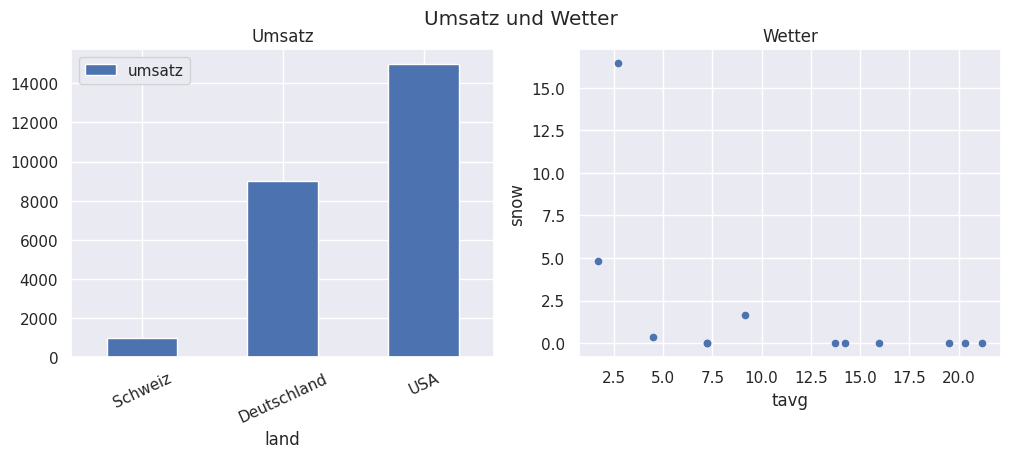

In [153]:
# subplots() gibt eine Figure und mehre Axis Objekte zurück
fig, axes = plt.subplots(nrows=1, 
                         ncols=2,
                         figsize=(12, 4)) # (width, height) in inches
print(f"fig: {fig}, axes: {axes} (n.B. zwei Elemente in axes)")
# in jeder *axis* (einzelnes Element in axes) platzieren wir einen Plot
ax1, ax2 = axes 
# -- suptitle definiert den Gesamttitle über alle Plots
plt.suptitle('Umsatz und Wetter')
# -- alle weiteren Einstellungen erfolgen pro axis (ax1, ax2)
# -- erster Plot:
df_umsatz.plot.bar(x='land', 
                   y='umsatz', 
                   ax=ax1)
ax1.set_title('Umsatz') # plt.title() => ax1.set_title()
ax1.set_xticklabels(ax1.get_xticklabels(), # plt.xticks => ax1.set_xticklabels()
                    rotation=25)
# -- zweiter Plot:
df_meteo.plot.scatter(x='tavg', 
                      y='snow', 
                      ax=ax2)
ax2.set_title('Wetter') # plt.title() => ax2.set_title()
# plot insgesamt anzeigen
plt.show()

# Wide Format, Long Format

* pandas bevorzugt Wide Format => pro Variable eine Spalte
* oft liegen Daten als Long Format vor => pro Zeile ein Wert, die Variable wird in einer Spalte angegeben
* Transformation von Long => Wide mit `pd.pivot_table()`
* Transformation von Wide => Long mit `pd.melt()`

In [154]:
from io import StringIO
daten = """
land,jahr,umsatz
Schweiz,2022,800
Schweiz,2023,1000
Deutschland,2022,7500
Deutschland,2023,9000
USA,2022,14300
USA,2023,15000
"""
in_memory_file = StringIO(daten)
df_fy_umsatz = pd.read_csv(in_memory_file)
df_fy_umsatz

,land,jahr,umsatz
0,Schweiz,2022,800
1,Schweiz,2023,1000
2,Deutschland,2022,7500
3,Deutschland,2023,9000
4,USA,2022,14300
5,USA,2023,15000


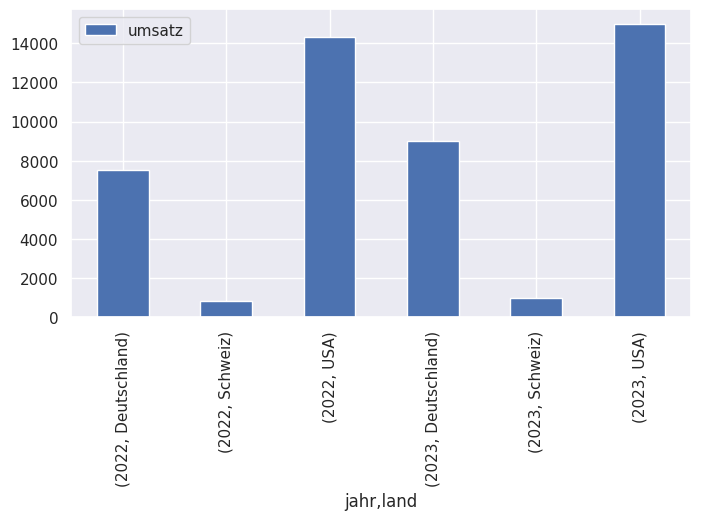

In [155]:
# Darstellung nach Gruppierung
# -- ok, aber nicht so schön
(df_fy_umsatz
 .groupby(['jahr', 'land'])
 .sum('umsatz')
 .plot.bar(y='umsatz'))
plt.show()

In [156]:
# besser: Transformation in Wide Format
# -- Ziel: pro Land eine eigene Spalte
df_fy_umsatz_w = (pd.pivot_table(df_fy_umsatz, 
                                index='jahr', # erste Gruppierung nach Jahr (Zeilen)
                                columns='land', # zwei Gruppierung nach Land (Spaten)
                                values='umsatz', # Aggregation des Umsatzes (wenn Gruppen-Grösse 1 => effektiv Kopie. Bei Grösse > 1 Vorsicht!)
                                aggfunc='sum') # Aggregation, z.B. sum, mean, max, min. Bei Gruppen-Grösse > 1 bedacht wählen
                  .reset_index()) # Indizierung nach Land aufheben
df_fy_umsatz_w

land,jahr,Deutschland,Schweiz,USA
0,2022,7500,800,14300
1,2023,9000,1000,15000


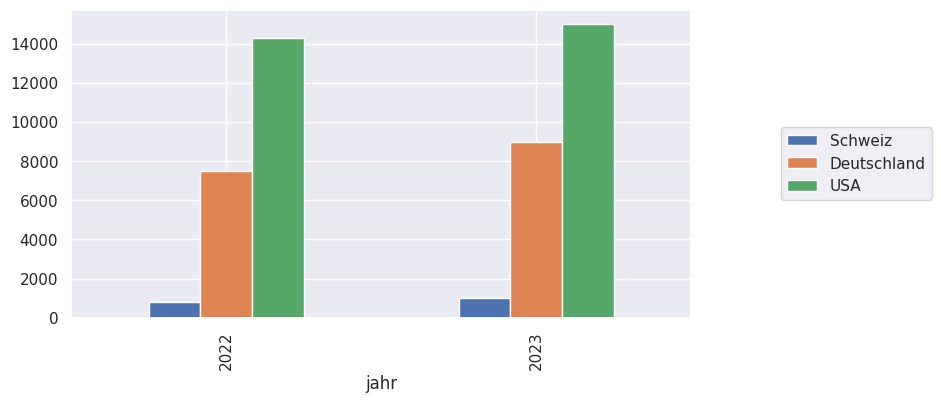

In [157]:
# so klappt's
df_fy_umsatz_w.plot.bar(x='jahr',
                        y=['Schweiz', 'Deutschland', 'USA']) # mit y=None, oder y= weglassen, werden alle numerischen Spalten gewählt
plt.legend(loc='center right', # lower left/center/right
           bbox_to_anchor=(1.4, .5)) # (0,0) = unten links, (1,1) = oben rechts, versuche je verschiedene Werte im Bereich (-2,...,+2)
plt.show()

# seaborn

* A library for statistical data visualization

Im Unterschied zu pandas kann seaborn:
 
* Daten automatisch aggregieren, um statistische Plots zu erstellen
* Mehrere Plots auf einmal erzeugen (das kann pandas zwar mit groupby() ebenfalls, seaborn ist jedoch einfacher und umfangreicher)
* Statistische Tests durchführen und im Plot einbetten (z.B. lineare Regression)

Seaborn bietet unterschiedliche Funktionen:

* sog. *Figure level* => erstellen ein oder mehrere Plots mit einem Befehl (z.B. nach Gruppierung)
* sog. *Axes level* => erstellen einen bestimmten Plot-Typ

Beide Funktionstypen können statistische Tests durchführen.

### Referenzen 

* https://seaborn.pydata.org/tutorial.html

# Eine erster seaborn Plot: Relational Plot

* Zwei oder mehr Variablen vergleichen => `sns.relplot()`
* Erstellt Scatterplots oder Lineplots => `sns.relplot(..., kind='scatter|line')`
* Detailliertes Tutorial: https://seaborn.pydata.org/tutorial/relational.html

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


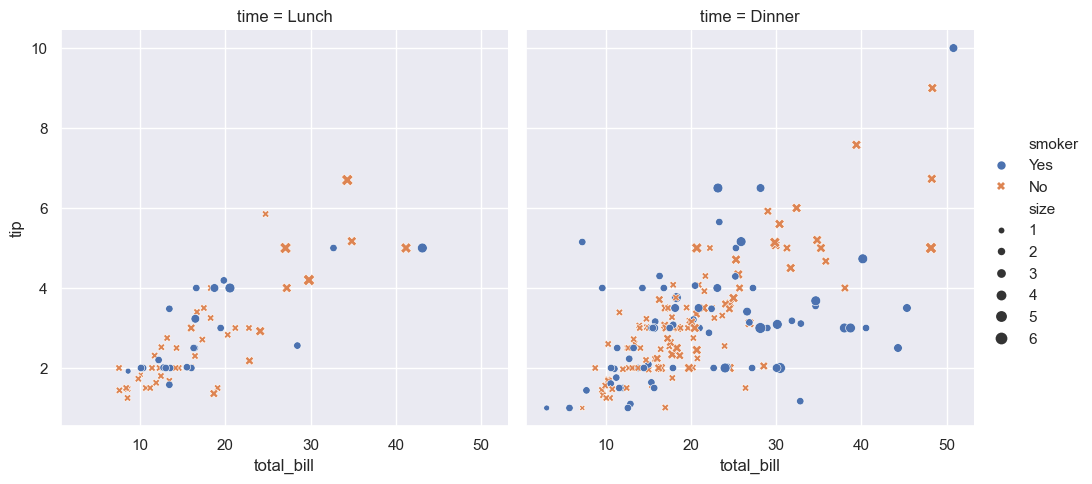

In [547]:
# Import seaborn
import seaborn as sns

# Load an example dataset
tips = sns.load_dataset("tips")

print(tips.head())

# Create a visualization
sns.relplot(
    data=tips, 
    x="total_bill", 
    y="tip", 
    col="time", # subplots nach Zeit (Lunch, Dinner)
    hue="smoker", # Farbe nach Smoker Status (Yes, No)
    style="smoker", # Marker nach  Smoker Status (Yes, No)
    size="size", # Grösse der Punkte nach Anzahl Gäste (1-6)
)

# Verteilungen mit seaborn

* Verteilungen darstellen => `sns.displot()`
* kann mehrere Plots auf einmal erzeugen => `sns.displot(..., col=)`
* kann Histogramme oder Kernel-Verteilungen darstellen => `sns.displot(..., kind='hist|kde')`
* kann mehrere Verteilungen auf einmal darstellen => `sns.displot(..., hue='column')`
* Detailliertes Tutorial: https://seaborn.pydata.org/tutorial/distributions.html#


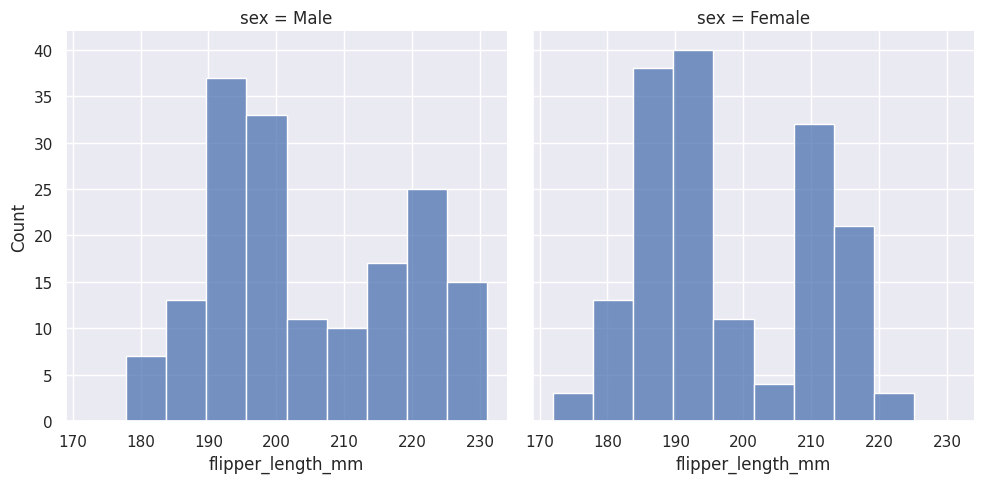

In [159]:
penguins = sns.load_dataset("penguins")
sns.displot(penguins, 
            x="flipper_length_mm", 
            kind='hist', # implizit "hist", versuche mit "kde"
            col="sex") # pro Geschlecht ein Plot (Male, Female)

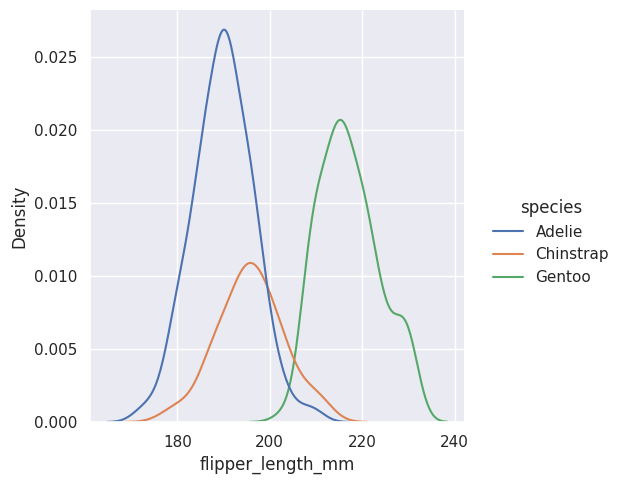

In [160]:
sns.displot(penguins, 
            x="flipper_length_mm", 
            hue="species", 
            kind="kde")

# Kategorische (gruppierte) Daten mit seaborn

* Vergleiche mehrerer Gruppen, z.B. mit einem Scatterplot => `sns.catplot()`
* Auch für (etwas) grössere Datenmengen geeignet => `sns.catplot(..., jitter=True|False)`
* Swarmplots: manchmal sind Scatterplots, sogar mit Jitter, zu wenig detailliert => `sns.catplot(..., kind='swarm')

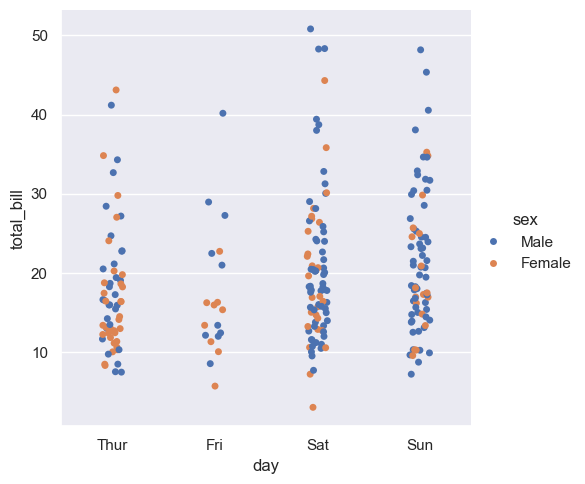

In [549]:
tips = sns.load_dataset("tips")
sns.catplot(data=tips, 
            x="day", 
            y="total_bill", 
            hue="sex", # einfärben der Punkte
            jitter=True) # verschiebt die einzelnen Marker leicht, um einzelne Punkte besser zu unterschieden  (versuche es mit False)

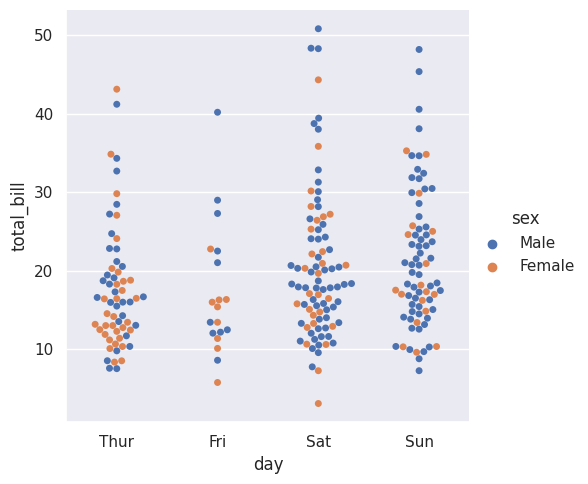

In [162]:
tips = sns.load_dataset("tips")
sns.catplot(data=tips, 
            x="day", 
            y="total_bill", 
            hue="sex", # einfärben der Punkte
            kind="swarm") # verschiebt die einzelnen Marker leicht, um einzelne Punkte besser zu unterschieden  (versuche es mit False)

* Verteilungen mit Boxplot => `sns.catplot(..., kind='box')`
* Gruppierung innerhalb eines Plots => `sns.catplot(..., hue='column')
* Pro Gruppe ein Plot => `sns.catplot(..., col='column')`

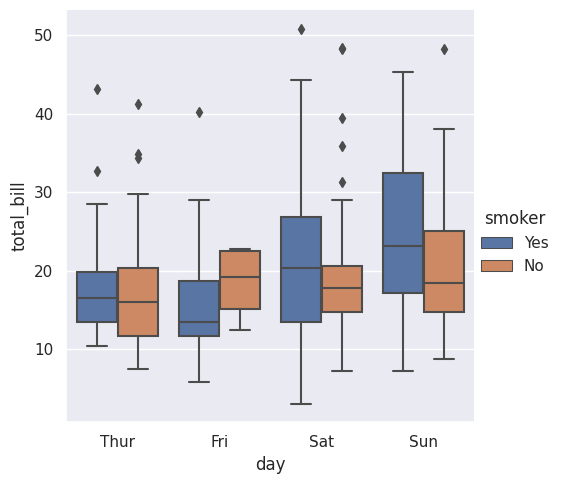

In [163]:
sns.catplot(data=tips, 
            x="day", 
            y="total_bill", 
            hue='smoker', # Gruppierung innerhalb von Tag
            kind="box")

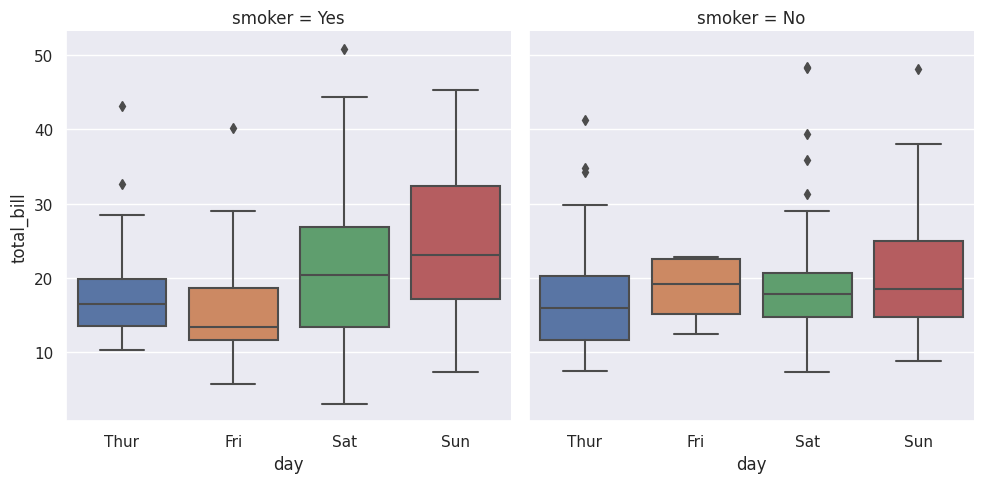

In [164]:
sns.catplot(data=tips, 
            x="day", 
            y="total_bill", 
            col='smoker', # mehrere Plots (analog relplot, displot)
            kind="box")

* Barplots mit Errorbar => `sns.catplot(..., kind='bar')`
* Berechnet den mean() pro Metrik, zeigt also Aggregation der Daten(!) => etwa `df.groupby().mean().plot.bar()` (nur schöner + einfacher)


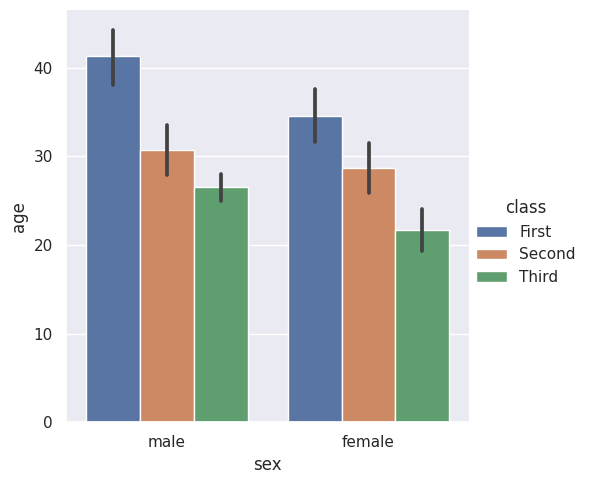

In [165]:
# ähnlich zu Pandas: `titanic.groupby(['sex', 'class']).mean('age').plot.bar(y='age')`
titanic = sns.load_dataset("titanic")
sns.catplot(data=titanic, 
            x="sex", 
            y="age", 
            hue="class", # Farbe
            ci=95, # confidence interval für Errorbar (versuche 90, 95, 99)
            kind="bar") # 

# Plotly 

* Library für interaktive Plots

Plotly bietet verschiende Funktionen an

* *Figure* => umfangreiche Detailfunktionen als Basis für Express => ähnlich wie Matplotlib für Pandas und Seaborn die Grundlage ist
* *Express* => einfache Funktionen => damit arbeiten wir 

### Referenzen

* Express: https://plotly.com/python/plotly-express/
* Figure: https://plotly.com/python/

# Scatter plot mit Plotly Express

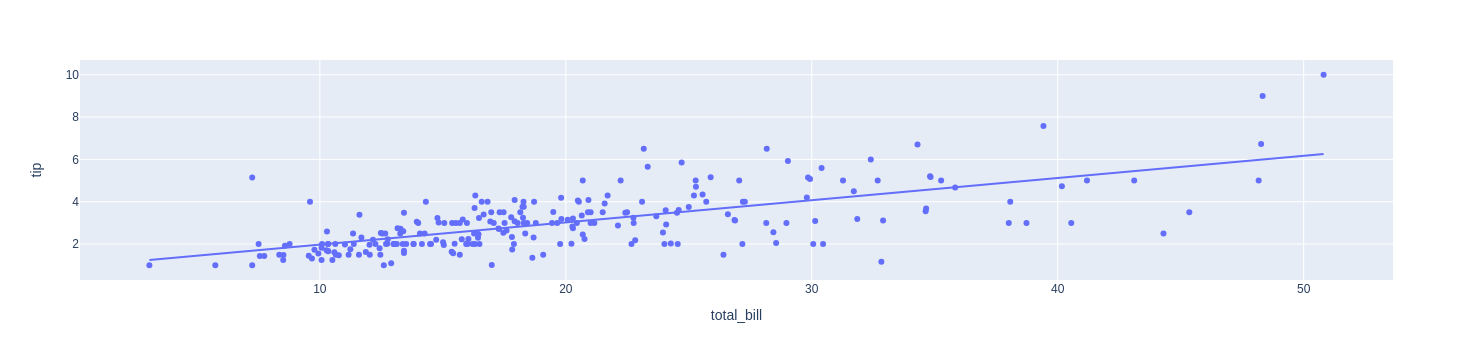

In [166]:
import plotly.express as px

df = px.data.tips()
fig = px.scatter(df, 
                 x="total_bill", 
                 y="tip", 
                 trendline="ols") # zeigt lineare Regression (weglassen, um nicht anzuzeigen)
fig.show()

# Line Plots

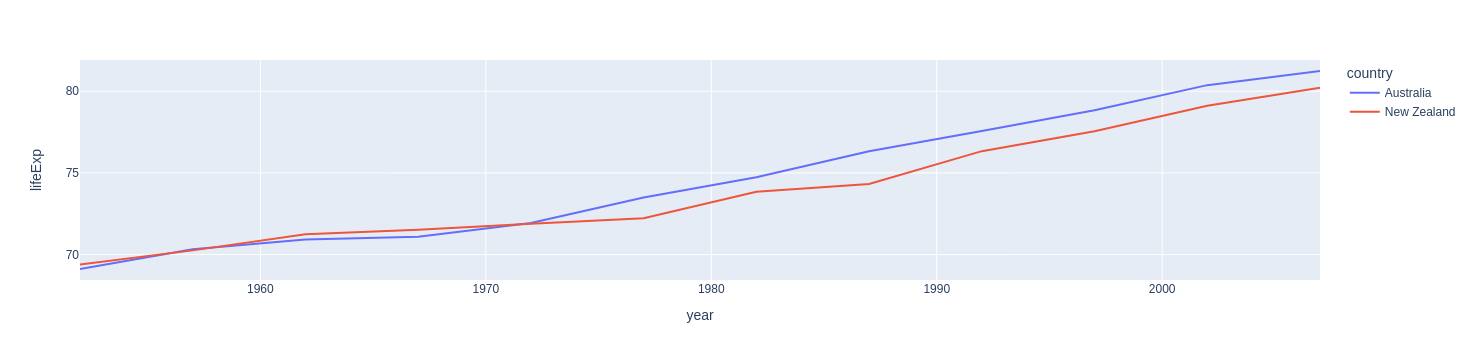

In [167]:
import plotly.express as px
df = px.data.gapminder().query("continent == 'Oceania'")
fig = px.line(df, x='year', y='lifeExp', color='country')
fig.show()

# 
Pie Charts

* Gruppiert Daten automatisch => `px.pie(..., values=)`
* Einfache "Donut"-Plots => `px.pie(..., hole=)`

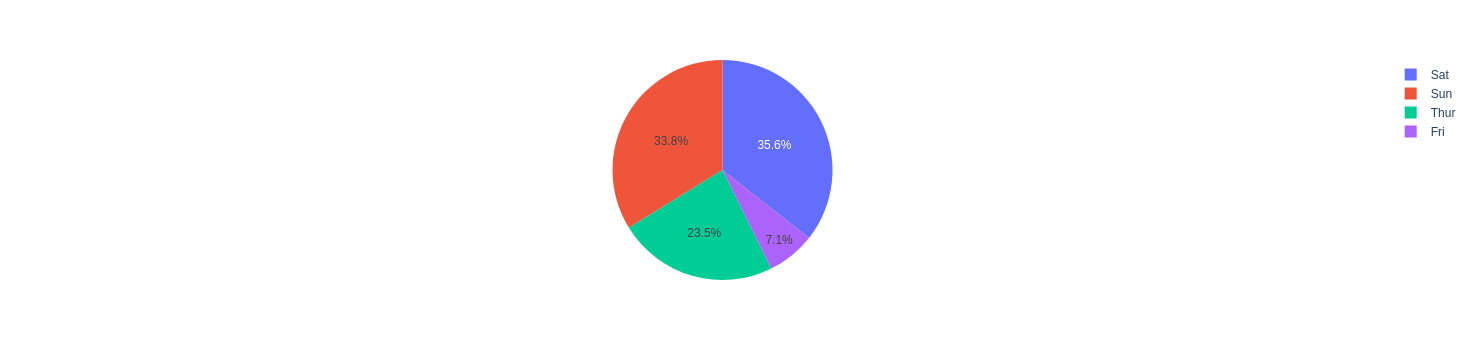

In [168]:
import plotly.express as px
# This dataframe has 244 lines, but 4 distinct values for `day`
df = px.data.tips()
fig = px.pie(df, 
             values='tip', # Column für 100%
             names='day') # Gruppierung
fig.show()

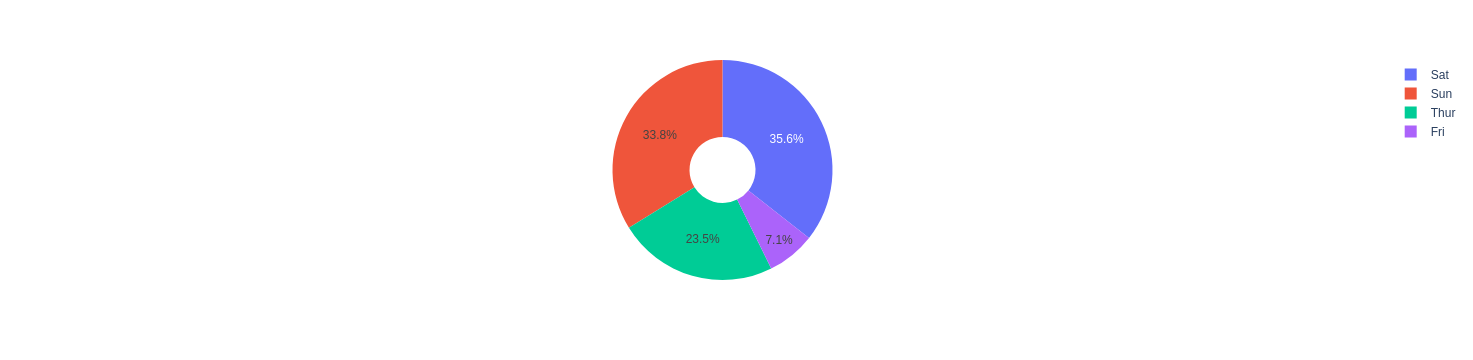

In [169]:
import plotly.express as px
# This dataframe has 244 lines, but 4 distinct values for `day`
df = px.data.tips()
fig = px.pie(df, 
             values='tip', 
             names='day',
             hole=.3)
fig.show()

# Interaktive Karten

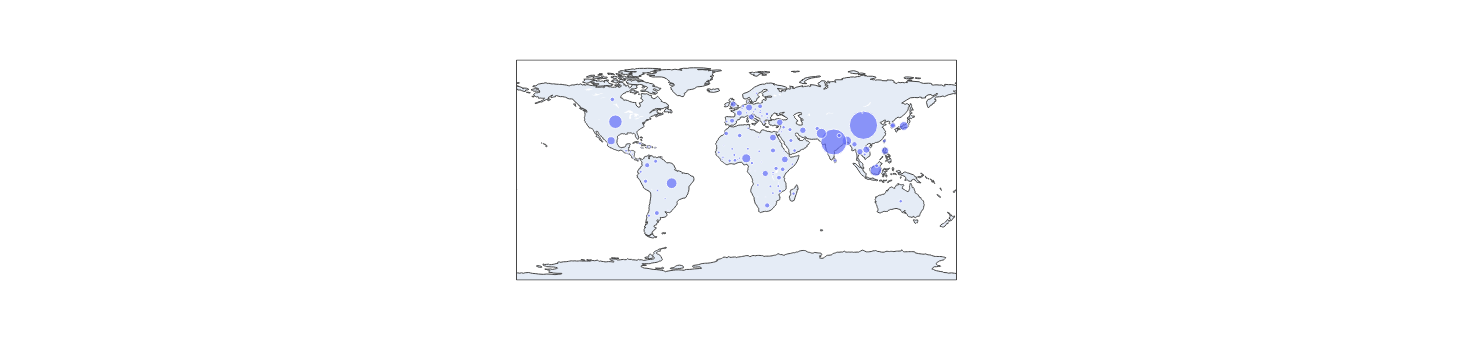

In [170]:
import plotly.express as px
df = (px.data.gapminder()
      .query("year == 2007"))
fig = px.scatter_geo(df, 
                     locations="iso_alpha",
                     size="pop", # size of markers, "pop" is one of the columns of gapminder
                     )
fig.show()

### Quellenangaben 

Für Daten- und Code Beispiele, soweit nicht vom Autor selbst:

* pandas: https://pandas.pydata.org/pandas-docs/version/2.1/user_guide/visualization.html, NumFocus Inc., BSD License
* seaborn: https://seaborn.pydata.org/tutorial/introduction.html, Michael Waskom, BSD License
* plotly: https://plotly.com/python/plotly-express/, Plotly Inc., MIT License
* Wetter-Daten: https://meteostat.net/de/, Christian Lamprecht, CC BY-NC 4.0 License